In [ ]:
# Import pandas
import pandas as pd

# Read 'monthly_max_temp.csv' into a DataFrame: weather1
weather1 = pd.read_csv('monthly_max_temp.csv', index_col='Month')

# Print the head of weather1
print(weather1.head())

# Sort the index of weather1 in alphabetical order: weather2
weather2 = weather1.sort_index()

# Print the head of weather2
print(weather2.head())

# Sort the index of weather1 in reverse alphabetical order: weather3
weather3 = weather1.sort_index(ascending=False)

# Print the head of weather3
print(weather3.head())

# Sort weather1 numerically using the values of 'Max TemperatureF': weather4
weather4 = weather1.sort_values( 'Max TemperatureF')

# Print the head of weather4
print(weather4.head())

In [ ]:
# Import pandas
import pandas as pd

# Reindex weather1 using the list year: weather2
weather2 = weather1.reindex( year)

# Print weather2
print(weather2)

# Reindex weather1 using the list year with forward-fill: weather3
weather3 =  weather1.reindex( year).ffill()

# Print weather3
print(weather3)

In [ ]:
# Import pandas
import pandas as pd

# Reindex names_1981 with index of names_1881: common_names
common_names = names_1981.reindex(names_1881.index)

# Print shape of common_names
print(common_names.shape)

# Drop rows with null counts: common_names
common_names = common_names.dropna()

# Print shape of new common_names
print(common_names.shape)

In [ ]:
# Extract selected columns from weather as new DataFrame: temps_f
temps_f = weather[['Min TemperatureF', 'Mean TemperatureF', 'Max TemperatureF']]

# Convert temps_f to celsius: temps_c
temps_c = (temps_f-32)*5/9

# Rename 'F' in column names with 'C': temps_c.columns
temps_c.columns = temps_c.columns.str.replace('F','C')

# Print first 5 rows of temps_c
print(temps_c.head())

In [ ]:
import pandas as pd

# Read 'GDP.csv' into a DataFrame: gdp
gdp = pd.read_csv('GDP.csv', index_col='DATE', parse_dates=True)

# Slice all the gdp data from 2008 onward: post2008
post2008 = gdp['2008':]

# Print the last 8 rows of post2008
print(post2008.tail(8))

# Resample post2008 by year, keeping last(): yearly
yearly = post2008.resample('A').last()

# Print yearly
print(yearly)

# Compute percentage growth of yearly: yearly['growth']
yearly['growth'] = yearly.pct_change() * 100

# Print yearly again
print(yearly)

In [ ]:
# Import pandas
import pandas as pd

# Read 'sp500.csv' into a DataFrame: sp500
sp500 = pd.read_csv('sp500.csv',parse_dates=True , index_col='Date')

# Read 'exchange.csv' into a DataFrame: exchange
exchange = pd.read_csv('exchange.csv',parse_dates=True , index_col='Date')

# Subset 'Open' & 'Close' columns from sp500: dollars
dollars = sp500[['Open','Close']]

# Print the head of dollars
print(dollars.head())

# Convert dollars to pounds: pounds
pounds = dollars.multiply(exchange['GBP/USD'], axis=0)

# Print the head of pounds
print(pounds.head())

In [ ]:
# Import pandas
import pandas as pd

# Load 'sales-jan-2015.csv' into a DataFrame: jan
jan = pd.read_csv('sales-jan-2015.csv',parse_dates=True , index_col='Date')

# Load 'sales-feb-2015.csv' into a DataFrame: feb
feb = pd.read_csv('sales-feb-2015.csv',parse_dates=True , index_col='Date')

# Load 'sales-mar-2015.csv' into a DataFrame: mar
mar = pd.read_csv('sales-mar-2015.csv',parse_dates=True , index_col='Date')

# Extract the 'Units' column from jan: jan_units
jan_units = jan['Units']

# Extract the 'Units' column from feb: feb_units
feb_units = feb['Units']

# Extract the 'Units' column from mar: mar_units
mar_units = mar['Units']

# Append feb_units and then mar_units to jan_units: quarter1
quarter1 = jan_units.append(feb_units.append(mar_units))

# Print the first slice from quarter1
print(quarter1.loc['jan 27, 2015':'feb 2, 2015'])

# Print the second slice from quarter1
print(quarter1.loc['feb 26, 2015':'mar 7, 2015'])

# Compute & print total sales in quarter1
print(quarter1.sum())

In [1]:
# Initialize empty list: units
units = []

# Build the list of Series
for month in [jan, feb, mar]:
    units.append(month['Units'])

# Concatenate the list: quarter1
quarter1 = pd.concat(units)

# Print slices from quarter1
print(quarter1.loc['jan 27, 2015':'feb 2, 2015'])
print(quarter1.loc['feb 26, 2015':'mar 7, 2015'])

NameError: name 'jan' is not defined

In [ ]:
# Resample and tidy china: china_annual china


china_annual = china.resample('A').last().pct_change(10).dropna()

# Resample and tidy us: us_annual
us_annual =  us.resample('A').last().pct_change(10).dropna()

# Concatenate china_annual and us_annual: gdp
gdp = pd.concat([china_annual, us_annual], join='inner',axis=1)

# Resample gdp and print
print(gdp.resample('10A').last())

In [ ]:
# with below cod, 2 rows intersect count
# combined = pd.merge(revenue, managers, on='city')

In [ ]:
# Merge revenue & managers on 'city' & 'branch': combined
combined = pd.merge(revenue, managers, left_on='city',right_on='branch')

# Print combined
print(combined)

In [ ]:
# Add 'state' column to revenue: revenue['state']
revenue['state'] = ['TX','CO','IL','CA']

# Add 'state' column to managers: managers['state']
managers['state'] = ['TX','CO','CA','MO']

# Merge revenue & managers on 'branch_id', 'city', & 'state': combined
combined = pd.merge(revenue, managers, on=['branch_id', 'city','state'] )

# Print combined
print(combined)

In [ ]:
# Perform the first ordered merge: tx_weather
tx_weather = pd.merge_ordered(austin, houston)

# Print tx_weather
print(tx_weather)

# Perform the second ordered merge: tx_weather_suff
tx_weather_suff = pd.merge_ordered(austin, houston, on='date',suffixes=['_aus','_hus'])

# Print tx_weather_suff
print(tx_weather_suff)

# Perform the third ordered merge: tx_weather_ffill
tx_weather_ffill = pd.merge_ordered(austin, houston, on='date',suffixes=['_aus','_hus'], fill_method='ffill')

# Print tx_weather_ffill
print(tx_weather_ffill)

In [ ]:
# Merge auto and oil: merged
merged = pd.merge_asof(auto, oil, left_on='yr', right_on='Date')

# Print the tail of merged
print(merged.tail())

# Resample merged: annually, on date and sprecific columns by aggregation mean
yearly = merged.resample('A', on='Date').mean()[['mpg','Price']]

# Print yearly
print(yearly)

In [ ]:
# Import pandas
import pandas as pd

# Create empty dictionary: medals_dict
medals_dict = {}

for year in editions['Edition']:

    # Create the file path: file_path
    file_path = 'summer_{:d}.csv'.format(year)
    
    # Load file_path into a DataFrame: medals_dict[year]
    medals_dict[year] = pd.read_csv(file_path)
    
    # Extract relevant columns: medals_dict[year]
    medals_dict[year] = medals_dict[year][['Athlete', 'NOC', 'Medal']]
    
    # Assign year to column 'Edition' of medals_dict
    medals_dict[year]['Edition'] = year
    
# Concatenate medals_dict: medals
medals = pd.concat(medals_dict, ignore_index=True)

# Print first and last 5 rows of medals
print(medals.head())
print(medals.tail())

In [ ]:
# Construct the pivot_table: medal_counts
"""Construct a pivot table from the DataFrame medals, aggregating by count (by specifying the aggfunc parameter). Use 'Edition' as the index, 'Athlete' for the values, and 'NOC' for the columns."""
medal_counts = medals.pivot_table(aggfunc='count', index='Edition', values='Athlete', columns='NOC')

# Print the first & last 5 rows of medal_counts
print(medal_counts.head())
print(medal_counts.tail())

In [ ]:
# Extract relevant columns and set index: hosts
hosts = hosts[['Edition','NOC']].set_index('Edition')

# Fix missing 'NOC' values of hosts
print(hosts.loc[hosts.NOC.isnull()])
hosts.loc[1972, 'NOC'] = 'FRG'

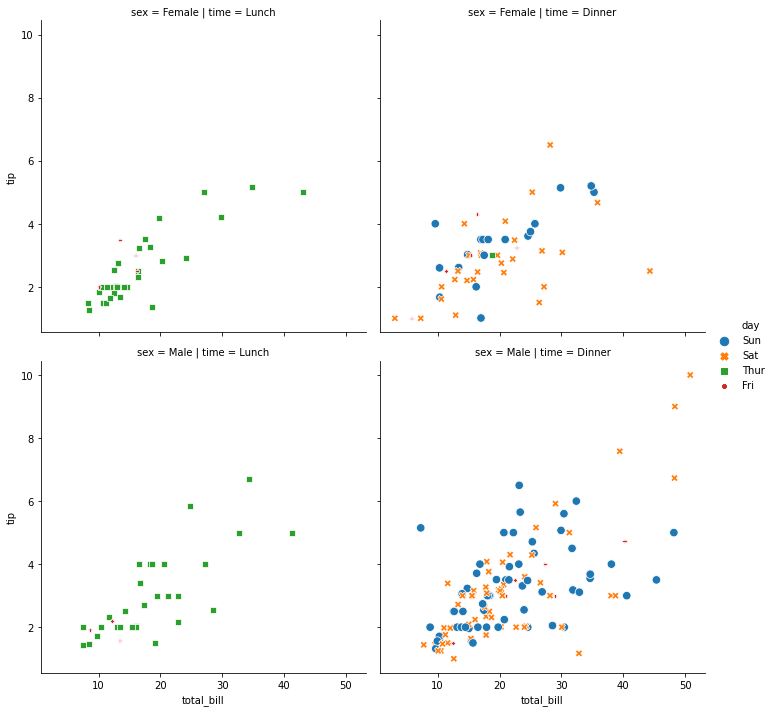

In [10]:
# Change to make subplots based on study time
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
data_tips= pd.read_csv('./datasets/tips.csv')
sns.relplot(x="total_bill", y="tip", 
            data=data_tips,
            kind="scatter", col='time', row='sex', col_order= ['Lunch', 'Dinner'], size='day', hue='day', style='day')

# Show plot
plt.show()

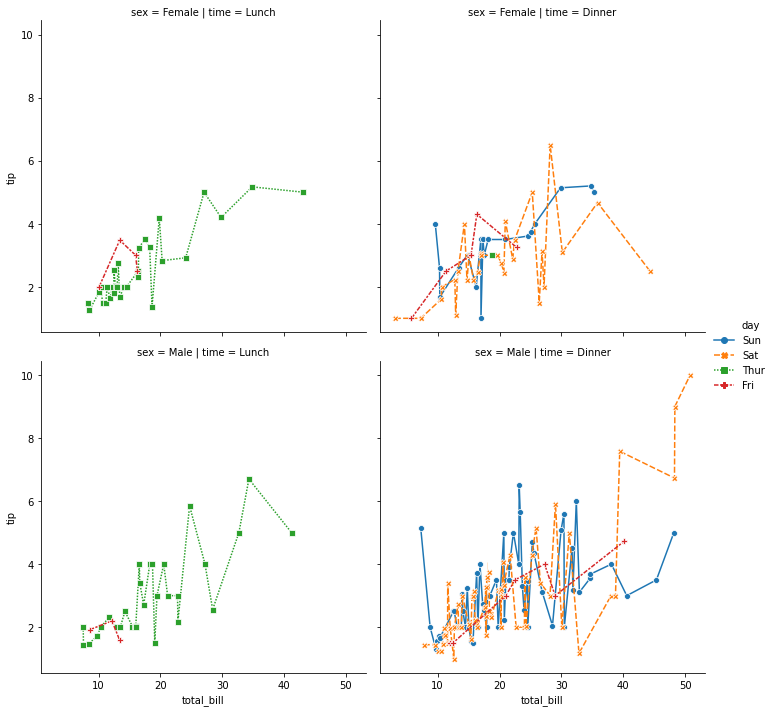

In [12]:
sns.relplot(x="total_bill", y="tip", 
            data=data_tips,
            kind="line", col='time', row='sex', col_order= ['Lunch', 'Dinner'], 
            dashes=False, markers=True,
            hue='day', style='day')

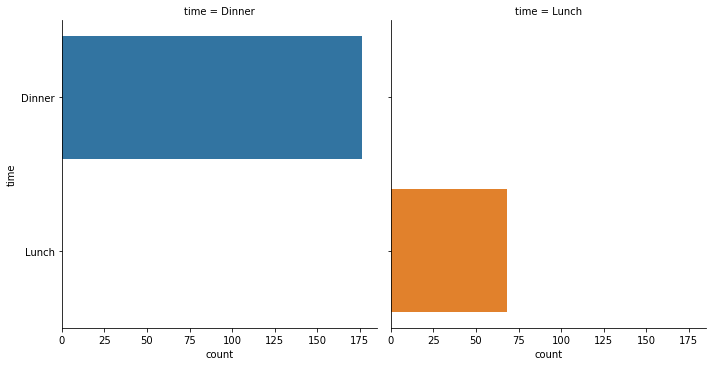

In [19]:
sns.catplot(y="time", data=data_tips,
            kind="count",col='time'
            )

# Show plot
plt.show()

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

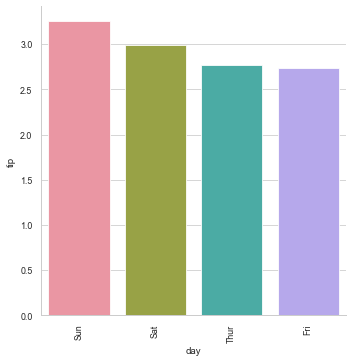

In [42]:
sns.catplot(x="day", y="tip",
            data=data_tips,
            kind="bar",
            order=["Sun", 
                   "Sat", 
                   "Thur", 
                   "Fri"], ci=None)
plt.xticks(rotation=45, xlabel={})

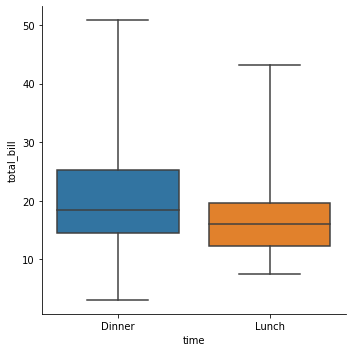

In [26]:
#boxplot: median, spread, skewness, outliers
g=sns.catplot(x='time', y='total_bill', data=data_tips,kind='box',order=['Dinner','Lunch'], whis=[0,100])
#changing the whiskers using 'whis  
#default: 1.5* the interquartile range 
# # whis=[0, 100]

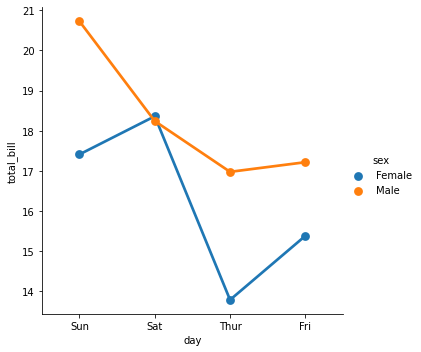

In [31]:
"""point plots
    meand of quantitative variable
    %95 confidence intervals for the mean 
Dİfference:
line plot has quantitative variable on x-axis
point plot has categorical variable on x-axis """
from numpy import median
sns.catplot(x="day", y="total_bill",
			data=data_tips,
            kind="point", hue='sex', ci=None, estimator=median)

Text(0.5, 0.98, 'FacetGrid title')

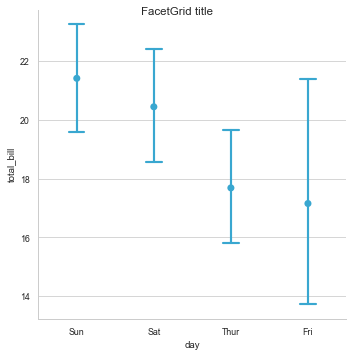

In [41]:
sns.set_style("whitegrid")#darkgrid
sns.set_palette("Purples") #notebook, talk, poster
sns.set_palette(['#39A7D0','#36ADA4'])
sns.set_context('paper')
g= sns.catplot(x="day", y="total_bill",
			data=data_tips,
            kind="point", capsize=0.2,join=False)
g.fig.suptitle('FacetGrid title')